# KNN

## Exercises
Create a new notebook, knn_model, and work with the titanic dataset to answer the following:

### Highlights

############# Markdown parser in Jupyter notebooks ##################

<div class="alert alert-block alert-info"> <b>NOTE</b>
 Use blue boxes for Tips and notes.
</div>

<div class="alert alert-block alert-success"> 
 Use green boxes sparingly, and only for some specific purpose that the other boxes can't cover. For example, if you have a lot of related content to link to, maybe   you decide to use green boxes for related links from each section of a notebook. 
</div>

<div class="alert alert-block alert-warning"> 
 Use yellow boxes for examples that are not inside code cells, or use for mathematical formulas if needed. 
</div>

<div class="alert alert-block alert-danger">
 In general, just avoid the red boxes. 
</div>

### Imports

In [1]:
import acquire
import prepare

import pandas as pd
import numpy as np

# matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn stuff:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

from pydataset import data

<div class="alert alert-block alert-success">
Load your DATA, PREPARE, SPLIT, CONVERT to X_train and y_train.
</div>

In [2]:
# Get your titanic data
titanic_df = acquire.get_titanic_data()

# Clean the new dataset using the new function called prep_titanic
titanic_df = prepare.prep_titanic(titanic_df)
      
# Prepare and Split my data
train, validate, test = prepare.split_function(titanic_df, 'survived')

# ---------------------------------------------------------------------------------
# Lets drop 'passenger_id', 'survived', 'sex', 'embarked' because they either are objects or don't add value to the data.
# Also, we need to remove the 'survived' column because is our TARGET.
# Also, lets convert train, validate and test. 
X_train = train.drop(columns = ['survived','passenger_id','sex','embarked'])
X_validate = validate.drop(columns = ['survived','passenger_id','sex','embarked'])
X_test = test.drop(columns = ['survived','passenger_id','sex','embarked'])

# ---------------------------------------------------------------------------------
# Set a target
target = 'survived'

# 'y' variable are series
y_train = train[target]
y_validate = validate[target]
y_test = test[target]

# Check the shape
print(f'X_train: {X_train.shape}, X_validate: {X_validate.shape}, X_test: {X_test.shape}')

# ---------------------------------------------------------------------------------
# calculate baseline accuracy
def establish_baseline(y_train):
    #est baseline
    baseline_prediction = y_train.mode()
    
    #create series of prediction with that baseline val
    #same len as y_train
    y_train_pred = pd.Series((baseline_prediction[0]), range(len(y_train)))
    
    #compute the confusion matrix for Accuracy
    cm= confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    
    return accuracy

# write a function to compute the baseline for a classification model

def establish_baseline(y_train):
    #  establish the value we will predict for all observations
    baseline_prediction = y_train.mode()

    # create a series of predictions with that value, 
    # the same length as our training set
    y_train_pred = pd.Series((baseline_prediction[0]), range(len(y_train)))

    # compute accuracy of baseline
    cm = confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp+tn)/(tn+fp+fn+tp)
    return accuracy

print(f'Baseline accuracy: {establish_baseline(y_train)}')

csv file found and loaded
X_train: (534, 8), X_validate: (178, 8), X_test: (179, 8)
Baseline accuracy: 0.6161048689138576


In [3]:
X_train.head()

,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
455,3,0,0,7.8958,1,1,0,0
380,1,0,0,227.5250,1,0,0,0
492,1,0,0,30.5000,1,1,0,1
55,1,0,0,35.5000,1,1,0,1
243,3,0,0,7.1250,1,1,0,1


#### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

##### 1a. Create the kNN object

In [9]:
# set to defaults
knn1 = KNeighborsClassifier(n_neighbors=5, weights='uniform')

##### 1b. Fit the model to the training data

In [10]:
knn1.fit(X_train, y_train)

KNeighborsClassifier()

##### 1c. Make predictions (Use it)

In [13]:
y_train_pred1 = knn1.predict(X_train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
y_train_pred1[:5]

array([0, 1, 1, 0, 0])

##### 1d. Estimate Probability

In [9]:
y_pred_proba1 = knn1.predict_proba(X_train)
y_pred_proba1[:5]

array([[0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [1. , 0. ]])

In [10]:
knn1.classes_

array([0, 1])

#### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [15]:
print('Accuracy of kNN classifier on training set: {:.9f}'
     .format(knn1.score(X_train, y_train)))

Accuracy of kNN classifier on training set: 0.814606742


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


##### Confusion matrix

In [17]:
#conf matrix
cm = confusion_matrix(y_train, y_pred1) #rows, columns
pd.DataFrame(cm, index=['Actual 0', 'Actual 1'],
             columns=['Pred 0', 'Pred 1'])

,Pred 0,Pred 1
Actual 0,280,49
Actual 1,50,155


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


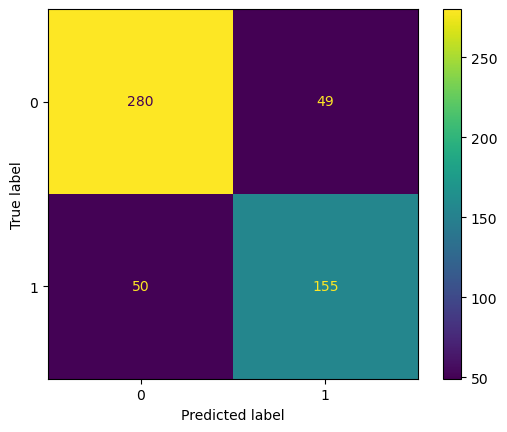

In [18]:
plot_confusion_matrix(knn1, X_train, y_train)

> 0: Not Survived - most freq

> 1: Survived

> TP: 280 (Not Survived)

> TN: 155 (Survived)

##### Classification report

In [19]:
print(classification_report(y_train, y_train_pred1))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       329
           1       0.76      0.76      0.76       205

    accuracy                           0.81       534
   macro avg       0.80      0.80      0.80       534
weighted avg       0.81      0.81      0.81       534



In [24]:
pd.DataFrame(classification_report(y_train, y_train_pred1, output_dict=True)).T

,precision,recall,f1-score,support
0,0.848485,0.851064,0.849772,329.000000
1,0.759804,0.756098,0.757946,205.000000
accuracy,0.814607,0.814607,0.814607,0.814607
macro avg,0.804144,0.803581,0.803859,534.000000
weighted avg,0.814441,0.814607,0.814521,534.000000


#### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [27]:

# Convert the confusion matrix into a DataFrame
pd.DataFrame(cm)

cm.ravel()


TN, FP, FN, TP = cm.ravel()
TN, FP, FN, TP

all_ = (TP + TN + FP + FN)


accuracy = (TP + TN) / all_
print(f"Accuracy: {accuracy}\n")

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")

support_pos = TP + FN
support_neg = FP + TN
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.8146067415730337

True Positive Rate/Sensitivity/Recall/Power: 0.7560975609756098
False Positive Rate/False Alarm Ratio/Fall-out: 0.14893617021276595
True Negative Rate/Specificity/Selectivity: 0.851063829787234
False Negative Rate/Miss Rate: 0.24390243902439024

Precision/PPV: 0.7598039215686274
F1 Score: 0.7579462102689486

Support (0): 205
Support (1): 329


In [29]:
tn, fp, fn, tp = cm.ravel()

accuracy = (tp+tn) / (tp + tn + fp + fn)

true_positive_rate = (tp) / (tp + fn)
false_positive_rate = (fp) / (fp + tn)
true_negative_rate = (tn) / (fp + tn)
false_negative_rate = (tn) / (tp + fn)

precision =  TP / (TP + FP)
recall = TP / (TP + FN)
f1_score =  2 * ((precision * recall) / ( precision + recall))

support_pos = TP + FN
support_neg = FP + TN

dict = {
        'metrics': ['accuracy'
                    ,'true_positve_rate'
                    ,'false_positive_rate'
                    ,'true_negative_rate'
                    ,'false_negative_rate'
                    ,'precision'
                    ,'recall'
                    ,'f1_score'
                    ,'support_pos'
                    ,'support_neg']
        ,'score': [accuracy
                    ,true_positive_rate
                    ,false_positive_rate
                    ,true_negative_rate
                    ,false_negative_rate
                    ,precision
                    ,recall
                    ,f1_score
                    ,support_pos
                    ,support_neg]
                    
        }
pd.DataFrame(dict)

,metrics,score
0,accuracy,0.814607
1,true_positve_rate,0.756098
2,false_positive_rate,0.148936
3,true_negative_rate,0.851064
4,false_negative_rate,1.365854
5,precision,0.759804
6,recall,0.756098
7,f1_score,0.757946
8,support_pos,205.000000
9,support_neg,329.000000


In [30]:
def print_cm_metrics(cm):
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp+tn) / (tp + tn + fp + fn)

    true_positive_rate = (tp) / (tp + fn)
    false_positive_rate = (fp) / (fp + tn)
    true_negative_rate = (tn) / (fp + tn)
    false_negative_rate = (tn) / (tp + fn)

    precision =  TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score =  2 * ((precision * recall) / ( precision + recall))

    support_pos = TP + FN
    support_neg = FP + TN

    dict = {
            'metrics': ['accuracy'
                        ,'true_positve_rate'
                        ,'false_positive_rate'
                        ,'true_negative_rate'
                        ,'false_negative_rate'
                        ,'precision'
                        ,'recall'
                        ,'f1_score'
                        ,'support_pos'
                        ,'support_neg']
            ,'score': [accuracy
                        ,true_positive_rate
                        ,false_positive_rate
                        ,true_negative_rate
                        ,false_negative_rate
                        ,precision
                        ,recall
                        ,f1_score
                        ,support_pos
                        ,support_neg]

            }
    pd.DataFrame(dict)
    return pd.DataFrame(dict)

In [ ]:
# Label the columns with a 0 and 1
labels = sorted(y_train.unique())
labels

[0, 1]

In [ ]:
pd.DataFrame(conf)

,0,1
0,280,49
1,50,155


In [ ]:
# Clean the table
pd.DataFrame(conf,
             index = [str(label) + '_actual' for label in labels],
             columns = [str(label) + '_predict' for label in labels])

,0_predict,1_predict
0_actual,280,49
1_actual,50,155


#### 4. Run through steps 1-3 setting k to 10

In [19]:
# MAKE THE THING: Create KNN Object
knn10 = KNeighborsClassifier(n_neighbors=10, weights='uniform')

# FIT THE THING: Fit object to training data
knn10.fit(X_train, y_train)

# USE  THE THING: Make predictions on training data
y_pred10 = knn10.predict(X_train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [20]:
print(classification_report(y_train, y_pred10))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       329
           1       0.75      0.64      0.69       205

    accuracy                           0.78       534
   macro avg       0.78      0.76      0.76       534
weighted avg       0.78      0.78      0.78       534



#### 5. Run through steps 1-3 setting k to 20

In [21]:
# MAKE THE THING: Create KNN Object
knn20 = KNeighborsClassifier(n_neighbors=20, weights='uniform')

# FIT THE THING: Fit object to training data
knn20.fit(X_train, y_train)

# USE  THE THING: Make predictions on training data
y_pred20 = knn20.predict(X_train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [22]:
print(classification_report(y_train, y_pred20))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       329
           1       0.72      0.54      0.62       205

    accuracy                           0.74       534
   macro avg       0.74      0.70      0.71       534
weighted avg       0.74      0.74      0.73       534



#### 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

#### 7. Which model performs best on our out-of-sample data from validate?

In [23]:
#iteration

model_accuracies = {}

for i in range(1,31):
    #MAKE THE THING
    knn = KNeighborsClassifier(n_neighbors=i)
    
    #FIT THE THING
    knn.fit(X_train, y_train)
    
    #USE THE THING
    model_accuracies[f'{i}_neighbors'] = {
        'train_score': round(knn.score(X_train, y_train),2),
        'validate_score':round(knn.score(X_validate, y_validate),2)
    }

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

In [24]:
model_accuracies

{'1_neighbors': {'train_score': 0.93, 'validate_score': 0.69},
 '2_neighbors': {'train_score': 0.86, 'validate_score': 0.72},
 '3_neighbors': {'train_score': 0.85, 'validate_score': 0.74},
 '4_neighbors': {'train_score': 0.82, 'validate_score': 0.74},
 '5_neighbors': {'train_score': 0.81, 'validate_score': 0.73},
 '6_neighbors': {'train_score': 0.8, 'validate_score': 0.72},
 '7_neighbors': {'train_score': 0.79, 'validate_score': 0.72},
 '8_neighbors': {'train_score': 0.79, 'validate_score': 0.73},
 '9_neighbors': {'train_score': 0.79, 'validate_score': 0.73},
 '10_neighbors': {'train_score': 0.78, 'validate_score': 0.71},
 '11_neighbors': {'train_score': 0.79, 'validate_score': 0.72},
 '12_neighbors': {'train_score': 0.78, 'validate_score': 0.71},
 '13_neighbors': {'train_score': 0.77, 'validate_score': 0.7},
 '14_neighbors': {'train_score': 0.77, 'validate_score': 0.69},
 '15_neighbors': {'train_score': 0.77, 'validate_score': 0.68},
 '16_neighbors': {'train_score': 0.77, 'validate_sc

In [25]:
pd.DataFrame(model_accuracies).T

,train_score,validate_score
1_neighbors,0.93,0.69
2_neighbors,0.86,0.72
3_neighbors,0.85,0.74
4_neighbors,0.82,0.74
5_neighbors,0.81,0.73
6_neighbors,0.80,0.72
7_neighbors,0.79,0.72
8_neighbors,0.79,0.73
9_neighbors,0.79,0.73
10_neighbors,0.78,0.71


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

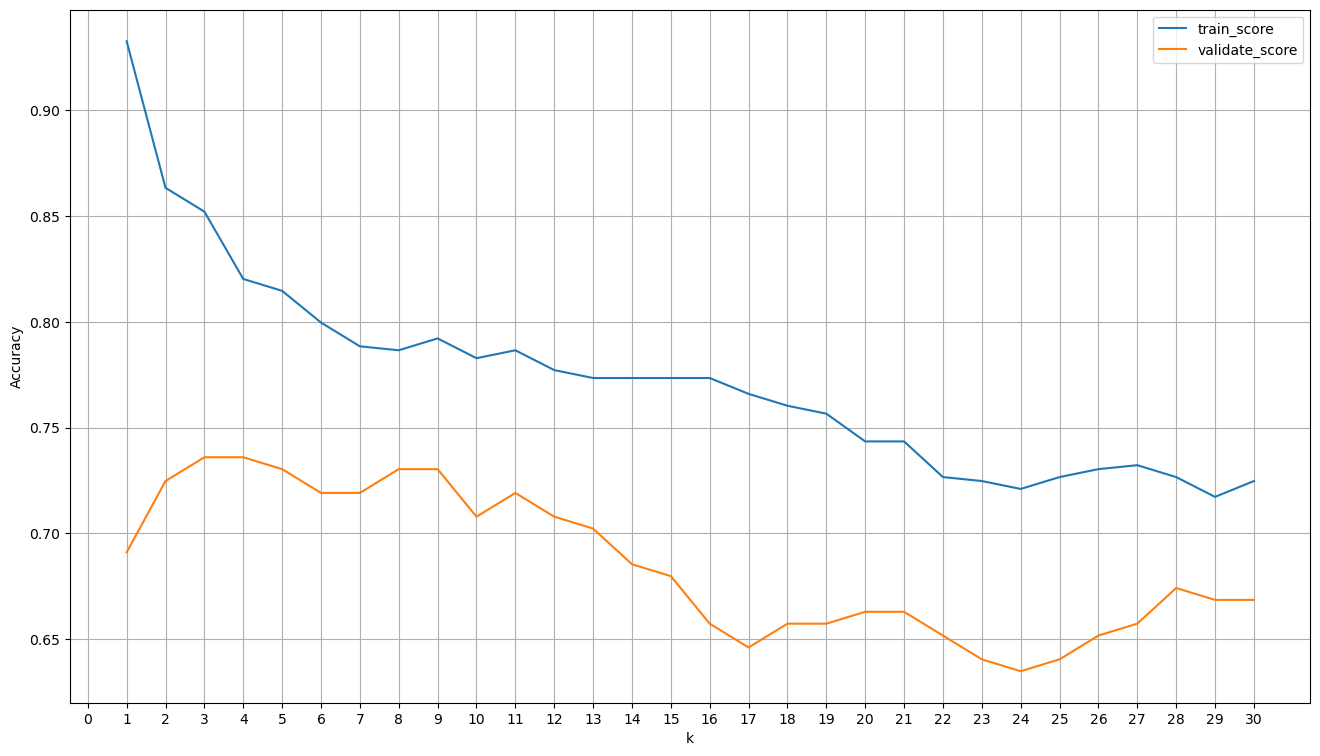

In [26]:
#VIZ

metrics = []

for k in range(1,31):
    
    # MAKE the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # FIT the thing (remember only fit on training data)
    knn.fit(X_train, y_train)
    
    # USE the thing (calculate accuracy)
    train_score = knn.score(X_train, y_train)
    validate_score = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_score": train_score,
        "validate_score": validate_score
    }
    
    metrics.append(output)
    
#conver to df
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,31,1))
plt.grid()